In [ ]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_style("white")
%matplotlib inline

In [ ]:
ds = "drive/MyDrive/Projetos/autos.csv"
df = pd.read_csv(ds,encoding='latin1')

In [ ]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,golf,150000,Jul,Gasoline,volkswagen,No,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,fabia,90000,Jul,Diesel,skoda,No,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [48]:
# Calcule a média de preço por marca e por veículo
df1 = pd.DataFrame()
for x in df['brand'].unique():
  for y in df['vehicleType'].unique():
    z = df[(df['brand']==x) & (df['vehicleType']==y)]['price'].mean()
    df1 = df1.append(pd.DataFrame({'brand':x , 'vehicleType':y, 'pricemean':z}, index=[0]))
df1 = df1.reset_index()
del df1['index']
df1['pricemean'].fillna(0,inplace=True)
df1['pricemean'] = df1['pricemean'].astype('int64')
df1.head()

,brand,vehicleType,pricemean
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


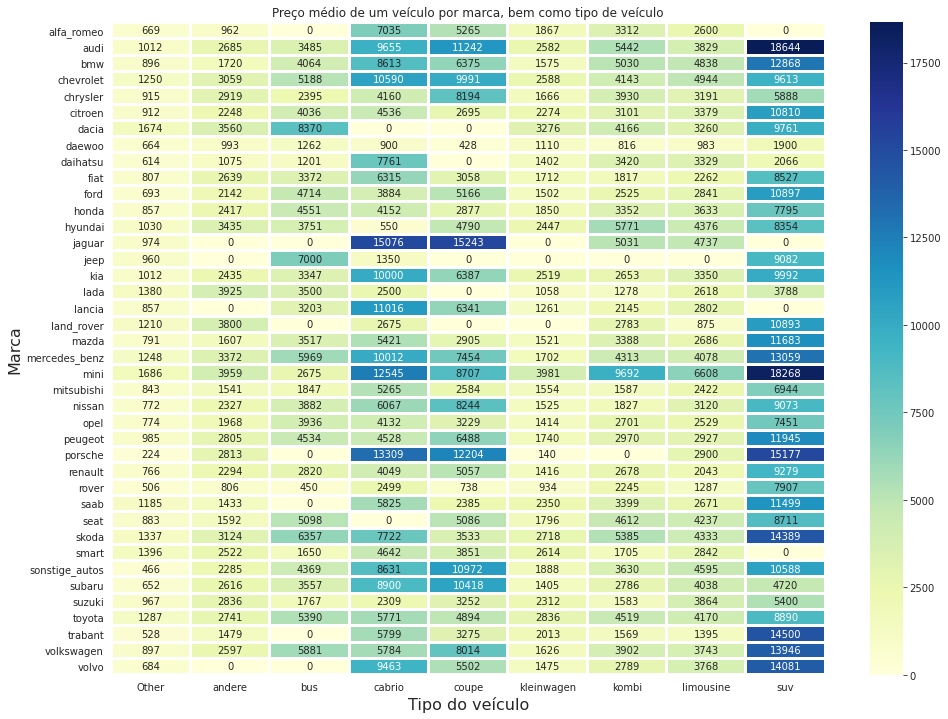

In [47]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
dtfr = df1.pivot('brand', 'vehicleType', 'pricemean')
sns.set_style('white')
plt.figure(figsize=(16,12))
sns.heatmap(dtfr,linewidths=2,cmap="YlGnBu",annot=True, fmt="d")
plt.xlabel("Tipo do veículo", fontsize = 16)
plt.ylabel('Marca', fontsize=16)
plt.title("Preço médio de um veículo por marca, bem como tipo de veículo")
plt.show()